# Student Activity: Market Analysis

In this activity, Harold has been asked to analyze the financial data of the companies in the S&P 500. Specifically, Harold has been asked to find and plot the following:

1. A pie chart of the S&P 500 company sector distribution.

2. A bar chart of the top 20 market cap companies.

3. A scatter plot of the price vs. earnings relationship.

Use the Pandas library to help Harold perform this analysis and generate the plots.

## Instructions

### Import the necessary libraries and dependencies.

In [11]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

### Read CSV in as DataFrame

In [12]:
# Set the path
data_path = Path('../Resources/sp500_companies.csv')

# Read in the CSV as a DataFrame
data_df = pd.read_csv(data_path)
data_df.head()

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,138721055226,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,10783419933,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,102121042306,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,181386347059,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,98765855553,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...


### Calculate Sector Counts

In [18]:
# Count the frequency of each sector from the list of companies
a = data_df['Sector'].value_counts()
a.describe

<bound method NDFrame.describe of Consumer Discretionary        84
Information Technology        70
Financials                    68
Industrials                   67
Health Care                   61
Consumer Staples              34
Real Estate                   33
Energy                        32
Utilities                     28
Materials                     25
Telecommunication Services     3
Name: Sector, dtype: int64>

### Plot Sector Counts

([<matplotlib.patches.Wedge at 0x22bcbef0668>,
 [Text(-0.5490120131411412, 0.9531976759448753, ''),
  Text(-1.0955278058003008, 0.09908999302844998, ''),
  Text(-0.7910095975038568, -0.764397682268063, ''),
  Text(0.04104895492617082, -1.099233816482858, ''),
  Text(0.8143996971679888, -0.7394275713365633, ''),
  Text(1.0882661181910405, -0.16023999499938904, ''),
  Text(1.059968095834358, 0.2940537974814904, ''),
  Text(0.8587942513324834, 0.6873663025478334, ''),
  Text(0.5490119908299398, 0.9531976887954283, ''),
  Text(0.21082277985438033, 1.079608149049678, ''),
  Text(0.020528025026056582, 1.0998084379511415, '')])

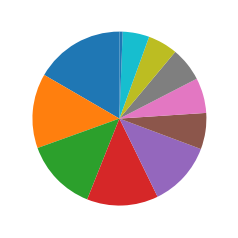

In [21]:
# Plot a pie chart from the distribution of company sectors
plt.pie(a, startangle=90)


### Filter By Top 20 Market Cap Companies

In [30]:
# Grab the `Symbol` and `Market Cap` columns
data_df_2 = data_df.loc[:, ['Symbol', 'Market Cap']]
data_df_2

# Set the 'Symbol' as the index. Drop the extra 'Symbol' column
data_df_2_index = data_df_2.set_index('Symbol')
data_df_2_index

# Filter down to 20 companies with the largest market caps. Display the DataFrame
data_df_2_index_top20 = data_df_2_index.nlargest(20, 'Market Cap')
data_df_2_index_top20.head(20)

,Market Cap
Symbol,
AAPL,809508034020
GOOGL,733823966137
GOOG,728535558140
MSFT,689978437468
AMZN,685873374731
FB,523423036576
JPM,386613611000
JNJ,353062464971
XOM,326148660000


### Plot Top 20 Market Cap Companies

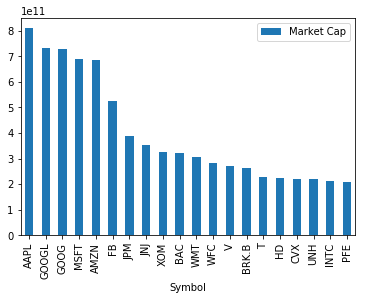

In [31]:
# Plot a bar chart of the top 20 market cap companies
data_df_2_index_top20.plot(kind='bar')

### Plot Relationship Between Price and Earnings/Share

In [39]:
# Plot a scatter plot to display the relationship between price vs. earnings/share
price_earnings_df = data_df.loc[:, ['Price', 'Earnings/Share']]
price_earnings_df

price_earnings_df_index = price_earnings_df.set_index('Price')
price_earnings_df_index

,Earnings/Share
Price,
222.89,7.92
60.24,1.70
56.27,0.26
108.48,3.29
150.51,5.44
...,...
70.24,1.83
76.30,4.07
115.53,9.01


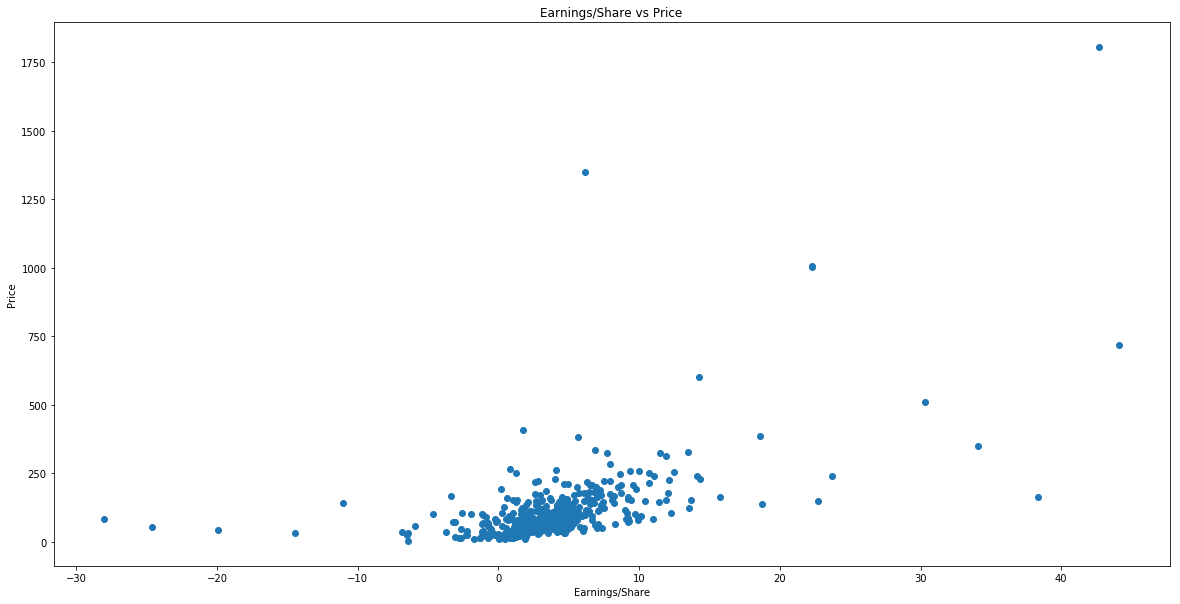

In [48]:
x = price_earnings_df['Earnings/Share']
y = price_earnings_df['Price']

plt.figure(figsize=(20,10))
plt.scatter(x, y)
plt.title('Earnings/Share vs Price')
plt.xlabel('Earnings/Share')
plt.ylabel('Price')
plt.show()